In [4]:
import torch
from utils.gaussian_diffusion import GaussianDiffusion
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./../data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./../data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

diffusion = GaussianDiffusion(img_size=(3, 32, 32), timesteps=1000, beta_start=0.0001, beta_end=0.02, device='cpu')

data_iter = iter(trainloader)
images, labels = next(data_iter)
images = images.to('cpu')

t = torch.randint(0, diffusion.timesteps, (images.size(0),), device='cpu').long()
x_t, noise = diffusion.forward_diffusion(images, t)

print(f"Input shape: {images.shape}")
print(f"Noisy shape: {x_t.shape}")

Input shape: torch.Size([32, 3, 32, 32])
Noisy shape: torch.Size([32, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5793524..1.5897119].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4170863..1.6353148].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5203489..1.4225441].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5615647..1.3869777].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.60871434..1.6884539].


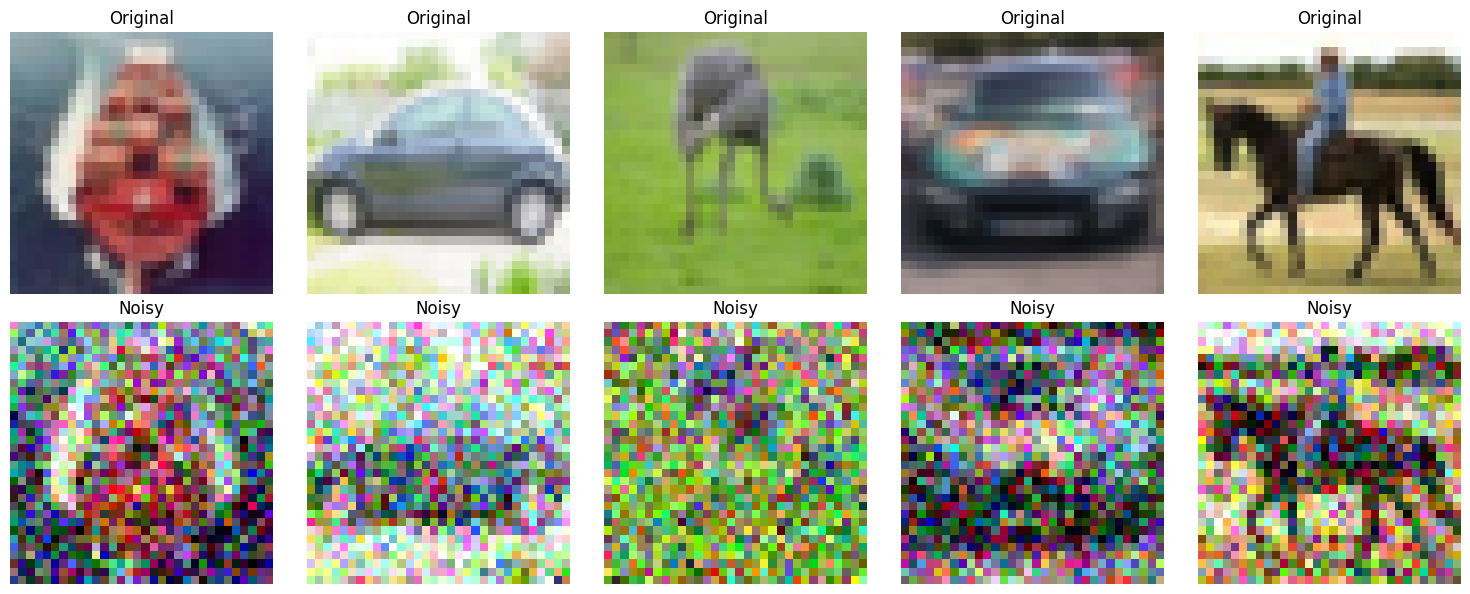

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_noisy_samples(images, noisy_images, num_samples=5):
    """
    Visualize original images and their corresponding noisy versions.
    
    Args:
        images (torch.Tensor): Batch of original images.
        noisy_images (torch.Tensor): Batch of noisy images.
        num_samples (int): Number of samples to visualize.
    """
    images = images.cpu().numpy()
    noisy_images = noisy_images.cpu().numpy()
    
    # Denormalize the images (assuming they were normalized between -1 and 1)
    images = (images * 0.5) + 0.5 
    noisy_images = (noisy_images * 0.5) + 0.5 
    
    fig, axs = plt.subplots(2, num_samples, figsize=(num_samples * 3, 6))

    for i in range(num_samples):
        img = np.transpose(images[i], (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        axs[0, i].imshow(img)
        axs[0, i].axis('off')
        axs[0, i].set_title('Original')
        
        noisy_img = np.transpose(noisy_images[i], (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        axs[1, i].imshow(noisy_img)
        axs[1, i].axis('off')
        axs[1, i].set_title('Noisy')

    plt.tight_layout()
    plt.show()

data_iter = iter(trainloader)
images, labels = next(data_iter)
images = images.to('cpu')

t = 150
noisy_images, noise = diffusion.forward_diffusion(images, t)

visualize_noisy_samples(images, noisy_images, num_samples=5)